<a href="https://colab.research.google.com/github/linhsuan519/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境準備

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# 載入資料與認識資料

In [66]:
#1. 在你的 Colab 程式碼中載入 `winequality-red.csv` 資料集，可以參考這一篇 教學 中的網址或上傳方法。

#（資料網址：https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv)
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
display(df)
display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


2. 請根據 Kaggle 文件瞭解 winequality-red 資料中所有欄位的定義為何？

Input variables (based on physicochemical tests):
* fixed acidity   非揮發性酸
* volatile acidity 揮發性酸 (太高會變醋)
* citric acid 檸檬酸 (新鮮或口味)
* residual sugar 自然殘糖 (發酵完的糖 克/公升)
* chlorides   氯化物 (鹽分)
* free sulfur dioxide  遊離二氧化硫
* total sulfur dioxide  總二氧化硫 (大約 = free 多數酒裡檢測不到)
* density 密度 (depending on the percent alcohol and sugar content)
* pH 酸鹼值 (0-14)
* sulphates 硫酸鹽 (抗菌劑)
* alcohol 酒精濃度 (%)
----------------------------
Output variable (based on sensory data):
* quality (score between 0 and 10) 品質評分








3. 請你嘗試觀察每一個「特徵」欄位（除 quality 外）資料的分佈情況，有看出什麼結果嗎？

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

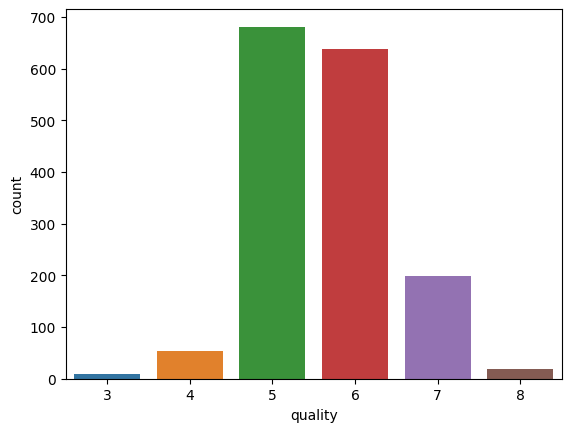

In [67]:
# 觀察 "quality" 標籤欄位的資料分佈情況
print(df['quality'].value_counts().sort_index())
sns.countplot(x='quality',data=df)

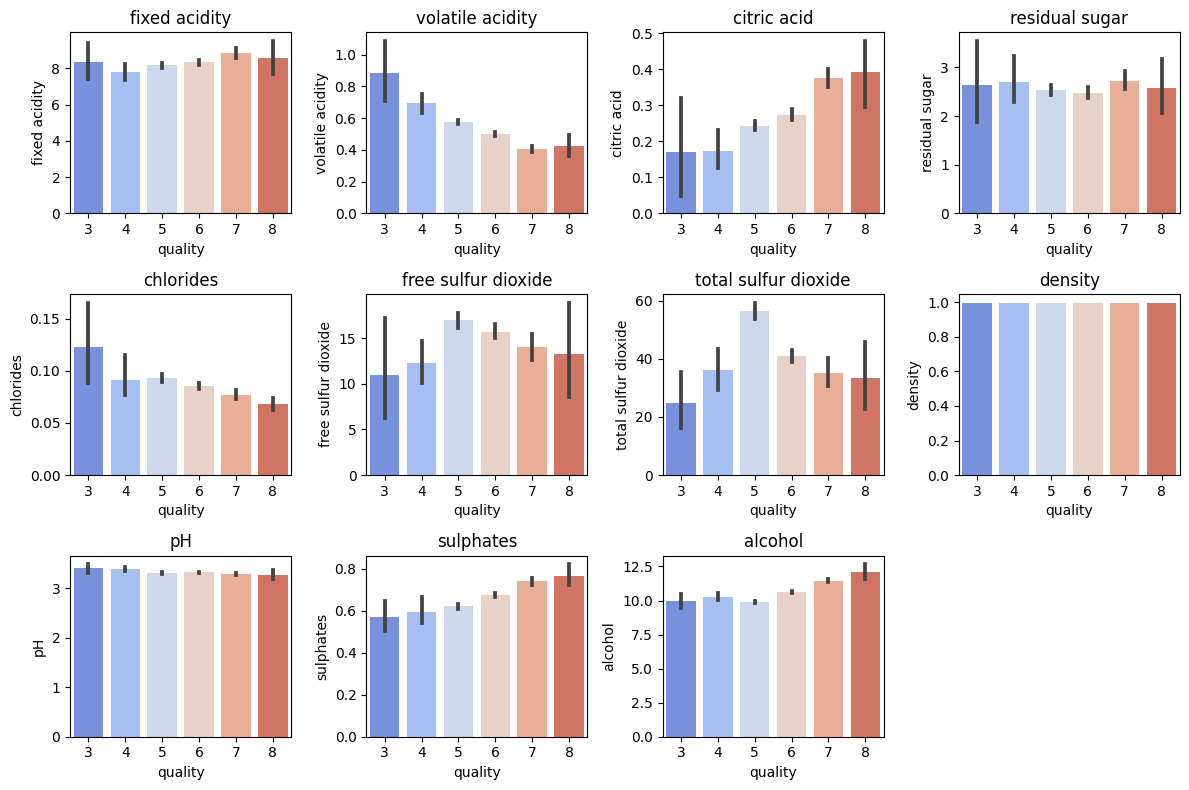

In [68]:
# 創建一個3x4的圖
fig, axes = plt.subplots(3, 4, figsize=(12, 8))

# 將axes攤平為一維矩陣，以利後續遍歷
axes = axes.flatten()

# 定義資料欄位的索引
column_index = 0

# 長條圖呈現各特徵的分布
for i in df.columns:
  if i != 'quality':
    sns.barplot(data=df, x='quality', y=i, palette='coolwarm', ax=axes[column_index])
    axes[column_index].set_title(i)
    column_index += 1

# 刪除最後一個空白圖表
axes[-1].remove()

# 調整子圖之間的間距
plt.tight_layout()

# 輸出圖表
plt.show()


**分析quality**
* 揮發性酸(volatile acidity) & 氯化物(chlorides) 負相關
* 檸檬酸(citric acid) &硫酸鹽(sulphates) & 酒精濃度(alcohol) 正相關
* 密度(density) & pH值 無關
* 游離二氧化硫 (free sulfur dioxide) & 總二氧化硫(total sulfur dioxide) 常態分配

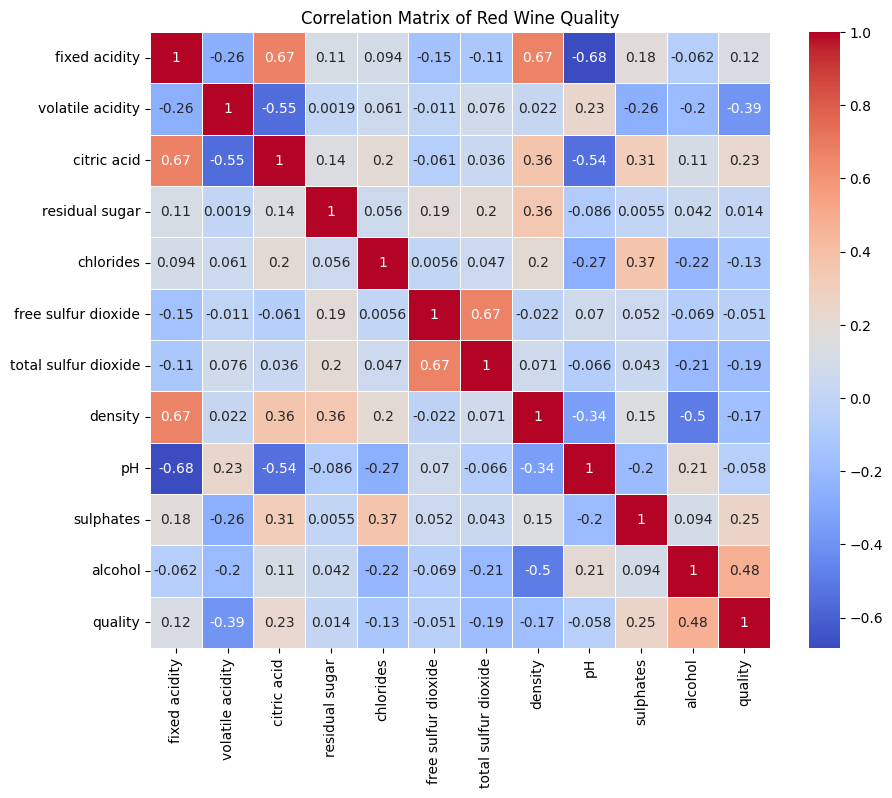

In [69]:
# 計算相關性
cor = df.corr()

# 使用seaborn和matplotlib，視覺化呈現
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,linewidth=0.5,cmap='coolwarm')
plt.title('Correlation Matrix of Red Wine Quality')
plt.show()

**與品質相關性高的先選五個**
* 酒精 (alcohol) 0.48
* 揮發性酸 (volatile acidity) -0.39
* 硫酸鹽 (sulphates) 0.25
* 檸檬酸 (citric acid) 0.23
* 總二氧化硫(total sulfur dioxide) -0.19


# **建立第一個 Baseline 版本**

# 資料前處理

In [70]:
#觀察資料
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [71]:
#確認是否有缺失值
df.isnull().sum() #無缺項

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [72]:
# 確認資料型態是否符合模型需求
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#模型分析

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 拆分訓練集與測試集
X = df.drop('quality', axis = 1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 使用隨機樹分類模型
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#模型評估

In [74]:
# 指標判斷模型表現
from sklearn.metrics import classification_report #https://blog.csdn.net/weixin_43945848/article/details/122061718
print(classification_report(y_test, pred_rfc))

# recall = x類別中被預測為x的比例 (實際-預測錯) / 實際樣本
# precision = 預測中正確預測 (實際-預測錯) / 預測樣本
# accuracy = 全部樣本被正確分類的比例 (總樣本-總誤差) / 總樣本
# macro avg = 平均
#weighted avg = 加權平均

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.84      0.80       135
           6       0.74      0.74      0.74       142
           7       0.52      0.56      0.54        27
           8       0.00      0.00      0.00         3

    accuracy                           0.73       320
   macro avg       0.34      0.36      0.35       320
weighted avg       0.70      0.73      0.71       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# 交叉驗證
from sklearn.model_selection import cross_val_score #https://blog.csdn.net/qq_36523839/article/details/80707678
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5 , scoring = 'accuracy')
print(rfc_eval.mean())

# cv = 測試次數

0.6653890931372549


# **特徵優化**

# 數據樣本不平衡

In [76]:
#重新採樣
from imblearn.over_sampling import RandomOverSampler #樣本數不足的會複製
X = df.iloc[:,:-1].values  #iloc方法根据位置选择，即选择所有行，所有列去掉右数第一列
y = df['quality'].values
ros = RandomOverSampler() #构造过采样方法
X,y = ros.fit_resample(X, y)
print(pd.DataFrame(y)[0].value_counts().sort_index()) #得到的x，y是数组，通过DataFrame转化为DataFrame格式

3    681
4    681
5    681
6    681
7    681
8    681
Name: 0, dtype: int64


In [77]:
from sklearn import ensemble
#设定随机森林分类模型
rf=ensemble.RandomForestClassifier(200) #设定包含100个决策树
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,X,y,cv=5,scoring='accuracy')
print(np.mean(score))

0.8666137966739788
